# OpenStreetMap Road Network Data Download and Processing
This notebook extracts road network data for the study area, Twente, from OpenStreetMap and process the data to produce an OD Matrix.


In [53]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon

# import matplotlib.cm as cm
# import matplotlib.colors as colors
# import random
# from random import sample
# from matplotlib.lines import Line2D
# import matplotlib.patches as patches
# from matplotlib.patches import Rectangle
# import seaborn as sns
# import matplotlib.image as mpimg

# from cProfile import label
# from mpl_toolkits.mplot3d import Axes3D
# from IPython.display import IFrame, display, Image

# np.set_printoptions(suppress=True)

In [3]:
# from shapely.geometry import Point, MultiPoint
# from shapely.ops import nearest_points

In [4]:
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

/var/folders/w_/w1t73xzx35j4jtrj94fjskj80000gn/T/ipykernel_25502/3210477311.py:2: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(log_console=True, use_cache=True)


'1.6.0'

## 1. Download and Load OSM Street Network Data

In [50]:
# Load the Twente Boundary shapefile
shapefile_path = '/Users/wenyuc/Desktop/UT/bioze_digital_mapping_tool/data/Twente_boundaries/Boundaries_Twente.shp'
twente = gpd.read_file(shapefile_path)

In [56]:
twente = twente.to_crs(epsg=4326)

In [65]:
polygon = twente['geometry'].squeeze()

In [63]:
# create customer filter 
# only main roads are needed
cf = '["highway"]["area"!~"yes"]["access"!~"private"]["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|road"]'

In [66]:
# create graph from polygon of Twente
G = ox.graph_from_polygon(polygon, network_type='drive', custom_filter=cf)

In [67]:
G = ox.project_graph(G, to_crs="EPSG:3857")

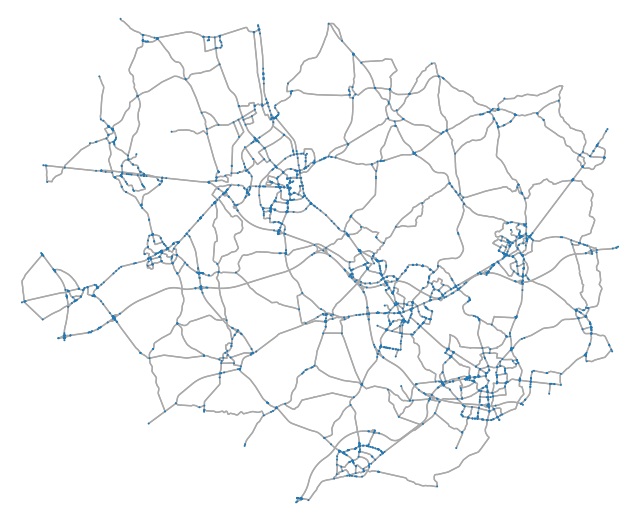

In [68]:
fig, ax = ox.plot_graph(G, node_size=2, node_color='tab:blue', edge_linewidth=1, edge_color= 'darkgray', figsize=(8,8), bgcolor='white')
# fig.savefig('./notebook_figures/G.eps',format='eps', dpi=1000,bbox_inches="tight")
# fig.savefig("./notebook_figures/G.png", format = 'png', dpi= 1000, bbox_inches="tight")

In [69]:
# consolidate intersection to further simplify the topography of the graph
G = ox.consolidate_intersections(G, tolerance=100, rebuild_graph=True, dead_ends=False)

/Users/wenyuc/opt/anaconda3/envs/bioze/lib/python3.11/site-packages/osmnx/simplification.py:542: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2-0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gdf.loc[idx, "cluster"] = f"{cluster_label}-{suffix}"


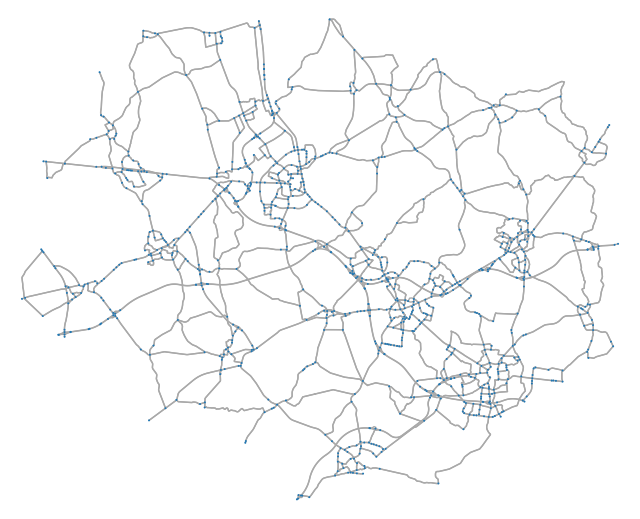

In [70]:
fig, ax = ox.plot_graph(G, node_size=2, node_color='tab:blue', edge_linewidth=1, edge_color= 'darkgray', figsize=(8,8), bgcolor='white')
# fig.savefig('./notebook_figures/G.eps',format='eps', dpi=1000, bbox_inches="tight")
# fig.savefig("./G.png", format = 'png', dpi= 1000, bbox_inches="tight") #transparent=True

In [75]:
ox.save_graphml(G, filepath="./osm_network/G", gephi=True)

In [76]:
# save graph as a geopackage
ox.save_graph_geopackage(G, filepath="./osm_network/G.gpkg")

In [71]:
n, e = ox.graph_to_gdfs(G)

In [77]:
n["geometry"].to_file("./osm_network/G_n.shp")

In [78]:
n[["geometry", "y", "x", "lon", "lat", "highway"]].to_file("./osm_network/G_n_complete.shp")

In [79]:
# Convert lists to strings
e['highway'] = e['highway'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
e[["geometry","highway"]].to_file("./osm_network/G_e.shp")

## 2. Farms to Nodes

## 3. Create OD Matrix

In [ ]:
# load the set of potential digester locations